# 05 -  Attributuion Modelling for Online Clickstream Data

# Introduction

## What is a Markov Chain?

A Markov chain is a type of probabilistic model. This means that it is a system for representing different states that are connected to each other by probabilities.

The state, in the example of our attribution model, is the channel or tactic that a given user is exposed to (e.g. a nonbrand SEM ad or a Display ad). The question then becomes, given your current state, what is your next most likely state?

Well one way to estimate this would be to get a list of all possible states branching from the state in question and create a conditional probability distribution representing the likelihood of moving from the initial state to each other possible state.

## Attributing the Conversions

Now that we have constructed the system that represents our user behavior it's time to use it to re-allocate the total number of conversions that occurred for a period of time.

What I like to do is take the entire system's probability matrix and simulate thousands of runs through the system that end when our simulated user arrives at either conversion or null. This allows us to use a rather small sample to generalize because we can simulate the random walk through the different stages of our system with our prior understanding of the probability of moving from one stage to the next. Since we pass a probability distribution into the mix we are allowing for a bit more variation in our simulation outcomes.

After getting the conversion rates of the system we can simulate what occurs when we remove channels from the system one by one to understand their overall contribution to the whole.

We do this by calculating the removal effect1 which is defined as the percentage of conversions we'd miss out on if a given channel or tactic was removed from the system.

In other words, if we create one new model for each channel where that channel is set to 100% no conversion, we will have a new model that highlights the effect that removing that channel entirely had on the overall system.

Mathematically speaking, we'd be taking the percent difference in the conversion rate of the overall system with a given channel set to NULL against the conversion rate of the overall system. We would do this for each channel. Then we create a weighting for each of them based off of the sum of removal effects and then we could finally then multiply that number by the number of conversions to arrive at the fractionally attributed number of conversions.

If the above paragraph confuses you head over to here and scroll about a third of the way down for a clear removal effect example. I went and made my example system too complicated for me to want to manually write out the the removal effect CVRs.

# Load data

Not currently able to use own data so mock data will be prepared. This is shown below.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from markovclick.models import MarkovClickstream
from markovclick.dummy import gen_random_clickstream
from markovclick.viz import visualise_markov_chain
%matplotlib inline
print('Modules imported')

Modules imported


In [18]:
data = gen_random_clickstream(n_of_streams=50, n_of_pages=795, length=(0,4))

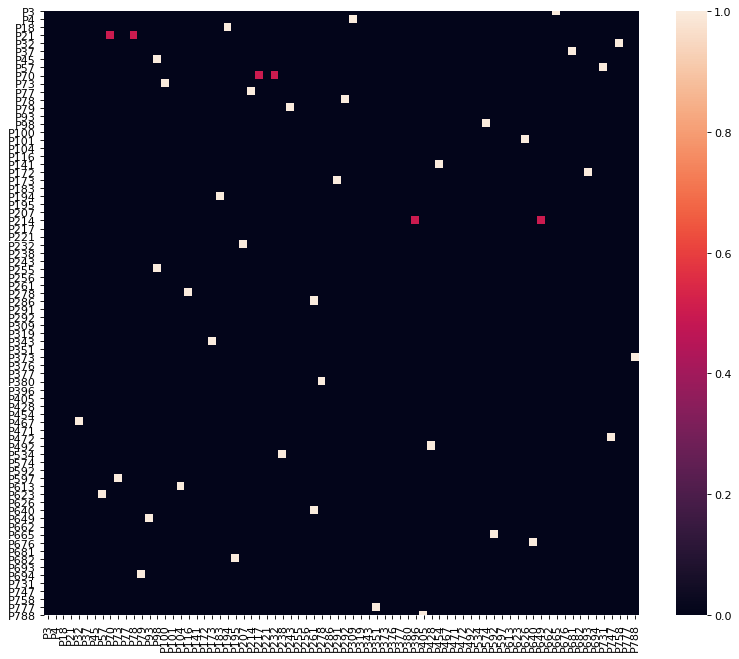

In [22]:
m = MarkovClickstream(data)
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(m.prob_matrix, xticklabels=m.pages, yticklabels=m.pages)

In [29]:
graph = visualise_markov_chain(m)

In [30]:
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH